# Build a model to predict the price of a Car.





# Objective: -


Purchasing car require lot of understanding about the use of cars and its mechanics. Everyone faces difficulty in selecting appropriate and reasonable cars . The price of a car depends on a lot of factors like  model, production year , category, brand, fuel type, engine volume, mileage, cylinders, color, airbags etc .

The goal of this project is to build a machine learning model that predicts the price of a car with the help of various features.Further accurate prediction of car price will help the customer to analyze the price of various cars and select the most appropriate for them according to their budget.

# Dataset: -

The dataset used in this project consistes of attributes of different cars . Dataset is divided in 2 csv files , train and test . I will combine the two dataset and amke a single dataframe

Attribute Information:
1. Price : (int)

17 real-valued features:

1) ID : Unique id of each observation (int)
2) Levy : tax or fee imposed by  government (int)
3) Manufacturer : Name of manufacturing company (string && categorical)
4) Model : Model name of the car (string && categorical)
5) Prod.year : Production year of the car (int)
6) Category : Type of car (string && Categorical)
7) Leather interior : If the car is leather interior or not . (Binary data)
8) Fuel type : type of fuel used in the car (Categorical)
9) Engine volume : Volume of the car engine (float)
10) Mileage : Mileage of car (int with km)
11) Cylinders : Number of cylinders used in the car (int)
12) Gear box type : Type of gear box used in the car (Categorical)
13) Drive wheels: Type of driver wheels used in the car (string && categorical)
14) Doors : Number of doors in the car (Numeric)
15) Wheel : positioning of the steering wheel in relation to the driver's seat. (Categorical)
16) Color : color of the car (Categorical)
17) Airbags : Number of airbags in the car (Numeric)



# Step 1: Import all the required libraries


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score
import plotly.express as px
import plotly.graph_objects as go

import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create or delete new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Merge the two DataFrames into a single DataFrame
df = pd.concat([train_df, test_df], ignore_index=True)

In [3]:
# To view the content inside the dataset we can use the head() method that returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

ID    Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328.0  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621.0  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467.0     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607.0   862         FORD   Escape        2011       Jeep   
4  45809263  11726.0   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km          6   
1               No    Petrol             3  192000 km          6   
2               No    Petrol           1.3  200000 km          4   
3              Yes    Hybrid           2.5  168966 km          4   
4              Yes    Petrol           1.3   91901 km          4   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

# Step3: Data Preprocessing

**Why need of Data Preprocessing?**

Preprocessing data is an essential step in data analysis.

Data can contain missing values and irrelevant attributes. To address this situation, we require data preprocessing.

By analysing the first five rows we found that there is a column named ID,it only shows the serial number so it is not helpful for us so we will drop it.

In [4]:
df = df.drop(['ID'], axis =1)

After we read the data, we can look at the data using:

In [5]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 27482 rows and 17 columns


#### The df.shape method shows the shape of the dataset. 

In [6]:
df.shape

(27482, 17)

#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27482 entries, 0 to 27481
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  float64
 1   Levy              27482 non-null  object 
 2   Manufacturer      27482 non-null  object 
 3   Model             27482 non-null  object 
 4   Prod. year        27482 non-null  int64  
 5   Category          27482 non-null  object 
 6   Leather interior  27482 non-null  object 
 7   Fuel type         27482 non-null  object 
 8   Engine volume     27482 non-null  object 
 9   Mileage           27482 non-null  object 
 10  Cylinders         27482 non-null  int64  
 11  Gear box type     27482 non-null  object 
 12  Drive wheels      27482 non-null  object 
 13  Doors             27482 non-null  object 
 14  Wheel             27482 non-null  object 
 15  Color             27482 non-null  object 
 16  Airbags           27482 non-null  int64 

The data set does not have any NA values . But in Levy column missing values are represented using "-" . We will put 0 in place of "-" .

In [8]:
df['Levy'] = df['Levy'].str.replace('-', '0').astype(int)

our dataset still needs some preprocessing tasks .

Engine volume column has two types value normal engine size and engine size with Turbo . We will create a new column called Turbo , that will have 0 if not turbo and 1 if it is turbo . the Engine volume column will containe the float value which is engine volume.

In [9]:
df['Turbo'] = df['Engine volume'].str.contains('Turbo').astype(int)

# Extract the numerical part of the engine size and store it in "Engine volume" as float
df['Engine volume'] = df['Engine volume'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

The Mileage column has values in the form "int km" like 186005 km . We have to remove km  from it to get the int value

In [10]:
df['Mileage'] = df['Mileage'].str.replace(' km', '').astype(int)

The Doors column has values in some unresonable form . It seems this column does not have any use . So , I am desciding to remove it .

In [11]:
df.drop(columns=['Doors'], inplace=True)

In [12]:
df.head()

Price  Levy Manufacturer    Model  Prod. year   Category  \
0  13328.0  1399        LEXUS   RX 450        2010       Jeep   
1  16621.0  1018    CHEVROLET  Equinox        2011       Jeep   
2   8467.0     0        HONDA      FIT        2006  Hatchback   
3   3607.0   862         FORD   Escape        2011       Jeep   
4  11726.0   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type  Engine volume  Mileage  Cylinders Gear box type  \
0              Yes    Hybrid            3.5   186005          6     Automatic   
1               No    Petrol            3.0   192000          6     Tiptronic   
2               No    Petrol            1.3   200000          4      Variator   
3              Yes    Hybrid            2.5   168966          4     Automatic   
4              Yes    Petrol            1.3    91901          4     Automatic   

  Drive wheels             Wheel   Color  Airbags  Turbo  
0          4x4        Left wheel  Silver       12      0  
1          4x4        Left wheel   Black        8      0  
2        Front  Right-hand drive   Black        2      0  
3          4x4        Left wheel   White        0      0  
4        Front        Left wheel  Silver        4      0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27482 entries, 0 to 27481
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  float64
 1   Levy              27482 non-null  int32  
 2   Manufacturer      27482 non-null  object 
 3   Model             27482 non-null  object 
 4   Prod. year        27482 non-null  int64  
 5   Category          27482 non-null  object 
 6   Leather interior  27482 non-null  object 
 7   Fuel type         27482 non-null  object 
 8   Engine volume     27482 non-null  float64
 9   Mileage           27482 non-null  int32  
 10  Cylinders         27482 non-null  int64  
 11  Gear box type     27482 non-null  object 
 12  Drive wheels      27482 non-null  object 
 13  Wheel             27482 non-null  object 
 14  Color             27482 non-null  object 
 15  Airbags           27482 non-null  int64  
 16  Turbo             27482 non-null  int32 

### Data Type Check for every column

**Why data type check is required?**

Data type check helps us with understanding what type of variables our dataset contains. It helps us with identifying whether to keep that variable or not. If the dataset contains contiguous data, then only float and integer type variables will be beneficial and if we have to classify any value then categorical variables will be beneficial.

In [14]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [15]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  9
There names are as follows:  ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']


In [16]:
int_cols = ['int']
int_lst = list(df.select_dtypes(include=int_cols).columns)

In [17]:
print("Total number of numerical columns are ", len(int_lst))
print("There names are as follows: ", int_lst)

Total number of numerical columns are  6
There names are as follows:  ['Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags', 'Turbo']


In [18]:
float_cols = ['float']
float_lst = list(df.select_dtypes(include=float_cols).columns)

In [19]:
print("Total number of float columns are ", len(float_lst))
print("There name are as follow: ", float_lst)

Total number of float columns are  2
There name are as follow:  ['Price', 'Engine volume']


# Step 3: Descriptive Analysis

**Goal/Purpose:**  Finding the data distribution of the features. Visualization helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Min value
7. Max value
8. Count Value
9. Quatilers
10. Correlation
11. Skewness

In [20]:
df.describe()

Price          Levy    Prod. year  Engine volume       Mileage  \
count  1.923700e+04  27482.000000  27482.000000   27482.000000  2.748200e+04   
mean   1.855593e+04    636.172076   2010.912452       2.313107  1.468036e+06   
std    1.905813e+05    565.312040      5.632865       0.881283  4.821110e+07   
min    1.000000e+00      0.000000   1939.000000       0.000000  0.000000e+00   
25%    5.331000e+03      0.000000   2009.000000       1.800000  7.050100e+04   
50%    1.317200e+04    642.000000   2012.000000       2.000000  1.266130e+05   
75%    2.207500e+04    917.000000   2015.000000       2.500000  1.897040e+05   
max    2.630750e+07  11714.000000   2020.000000      20.000000  2.147484e+09   

          Cylinders       Airbags         Turbo  
count  27482.000000  27482.000000  27482.000000  
mean       4.593734      6.563569      0.100393  
std        1.413918      4.329256      0.300529  
min        1.000000      0.000000      0.000000  
25%        4.000000      4.000000      0.000000  
50%        4.000000      6.000000      0.000000  
75%        4.000000     12.000000      0.000000  
max      127.000000     16.000000      1.000000

#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column .
count - The number of not-empty values. mean - The average (mean) value. 

- Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.
- Use Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.



__Label Encoding__ refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

## Visualizing categorical attributes

## PI charts based on Manufacturer and Model

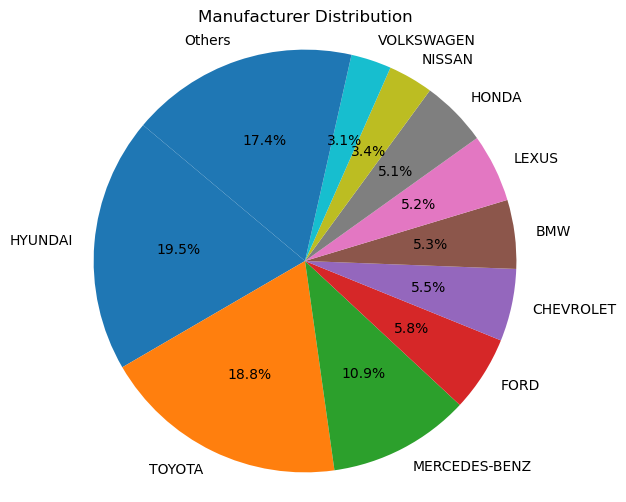

In [30]:
manufacturer_counts = df['Manufacturer'].value_counts()
total_cars = len(df)
manufacturer_percentages = manufacturer_counts / total_cars * 100

# Combine manufacturers with less than 3% share into "Others"
others_mask = manufacturer_percentages < 3
others_percentage = manufacturer_percentages[others_mask].sum()
manufacturer_percentages = manufacturer_percentages[~others_mask]
manufacturer_percentages['Others'] = others_percentage

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(manufacturer_percentages, labels=manufacturer_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Manufacturer Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Most of the cars are manufactured by HYUNDAI , TOYOTA and MERCEDES-BENZ . IT suggests that this cars are in most demand and they capture a huge market .

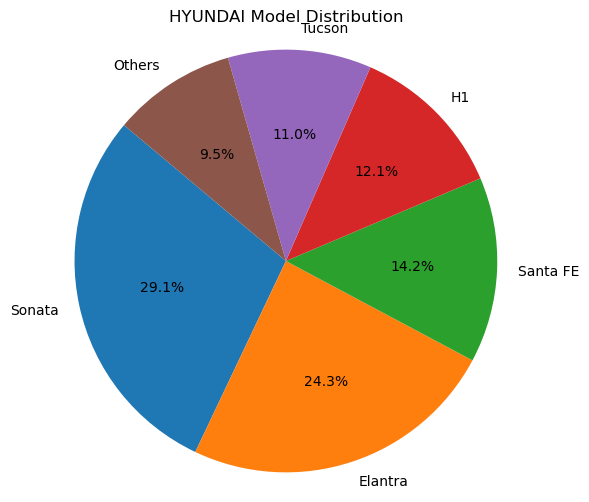

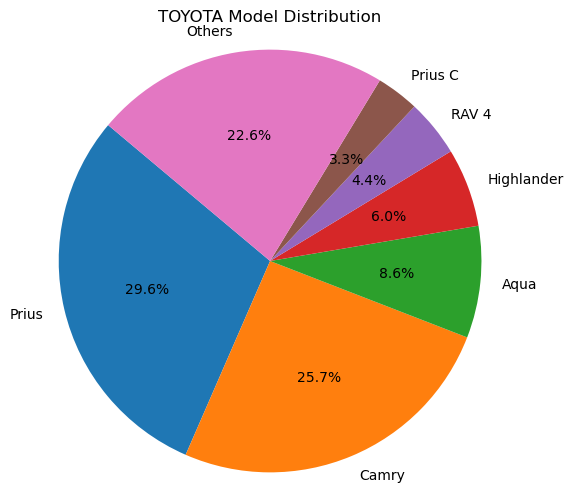

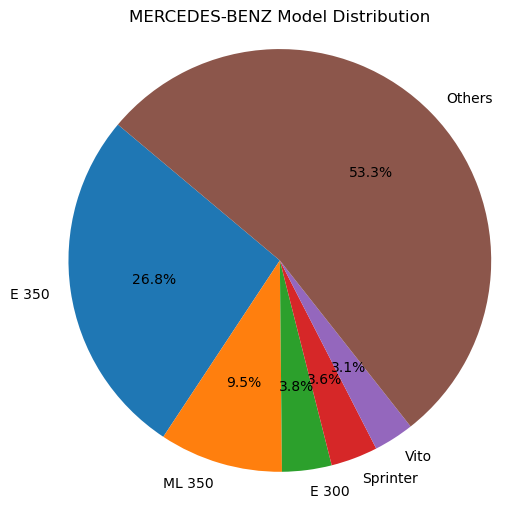

In [31]:
# Taking manufacturers that sold  most of the cars .
manufacturers_of_interest = ['HYUNDAI', 'TOYOTA', 'MERCEDES-BENZ']
for manufacturer in manufacturers_of_interest:
    manufacturer_data = df[df['Manufacturer'] == manufacturer]
    model_counts = manufacturer_data['Model'].value_counts()
    total_cars = len(manufacturer_data)
    
    # Combine models with less than 3% share into "Others"
    others_mask = model_counts / total_cars * 100 < 3
    others_count = model_counts[others_mask].sum()
    model_counts = model_counts[~others_mask]
    model_counts['Others'] = others_count
    
    # Plotting the pie chart for the current manufacturer
    plt.figure(figsize=(6, 6))
    plt.pie(model_counts, labels=model_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'{manufacturer} Model Distribution')
    plt.axis('equal') 
    plt.show()

## PI chart based on car category .

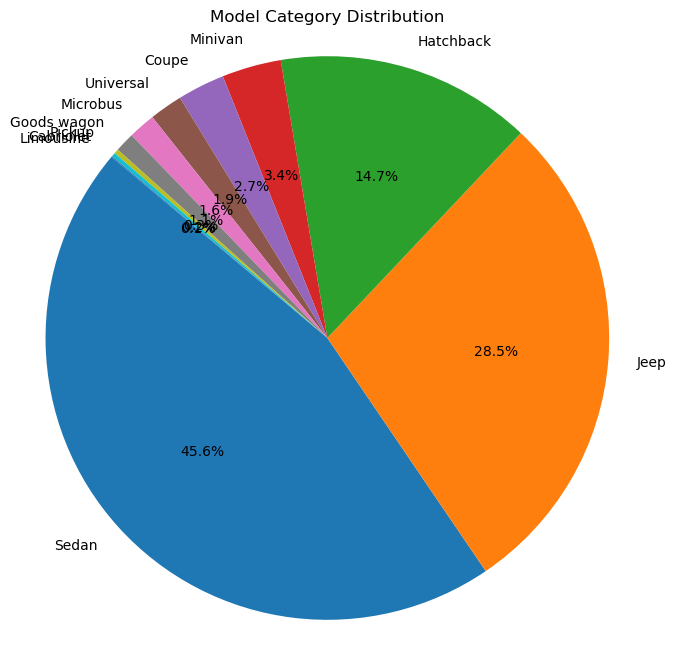

In [32]:
model_categories = df['Category'].unique()

category_counts = df['Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Model Category Distribution')
plt.axis('equal')
plt.show()

Sedan , Jeep and Hatchbacks are the most sold category of cars .

## PI chart based on interior

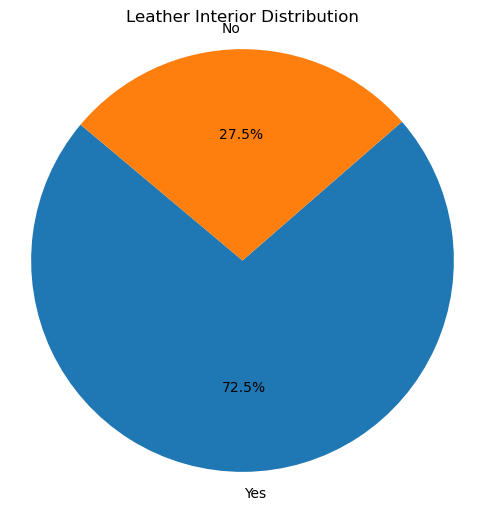

In [33]:
leather_counts = df['Leather interior'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(leather_counts, labels=leather_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Leather Interior Distribution')
plt.axis('equal')
plt.show()

A huge chanks of cars that are sold have Leather interior .

## PI chart based on Fuel type

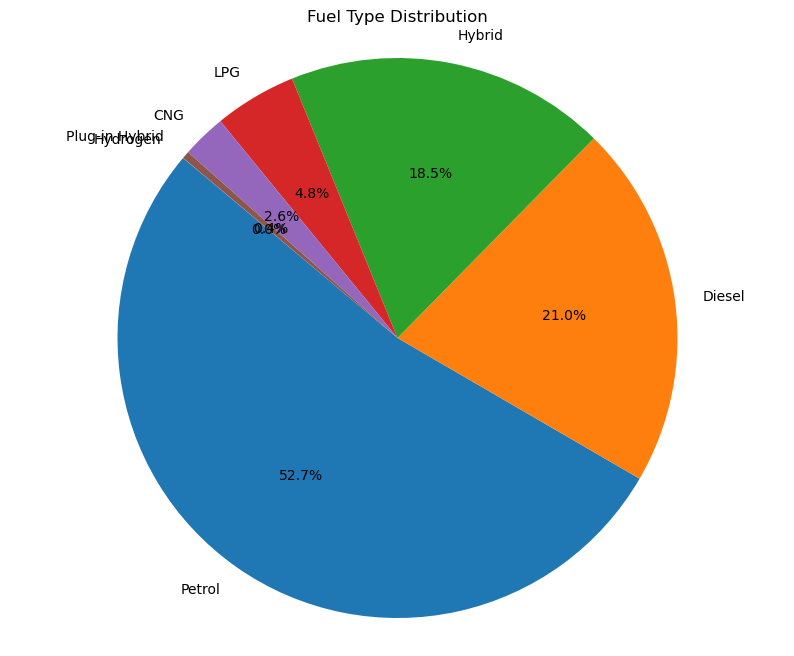

In [34]:
fuel_type_counts = df['Fuel type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fuel Type Distribution')
plt.axis('equal') 
plt.show()

Most of the car sold are Petrol , Diesel and Hybrid .

## barplot based on Cylinders

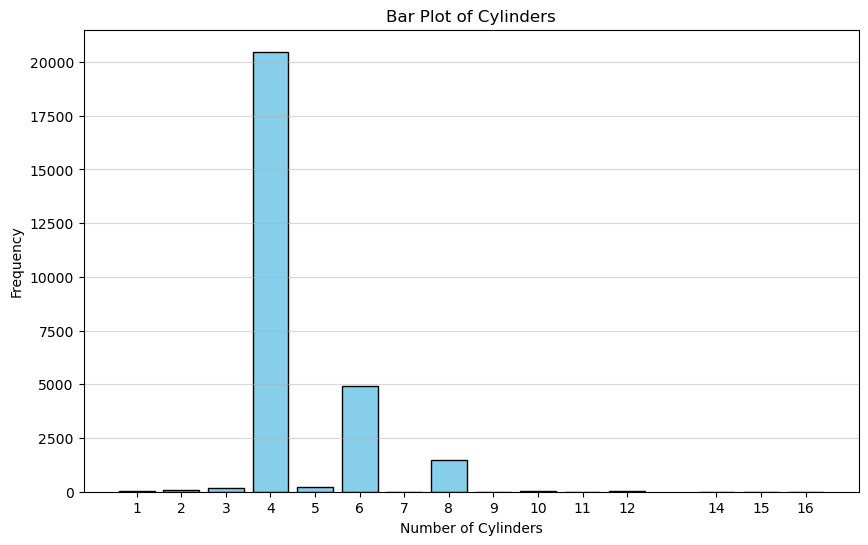

In [36]:
df['Cylinders'] = df['Cylinders'].astype(int)
cylinder_counts = df[df['Cylinders']<100]['Cylinders'].value_counts().sort_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(cylinder_counts.index, cylinder_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Cylinders')
plt.ylabel('Frequency')
plt.title('Bar Plot of Cylinders')
plt.xticks(cylinder_counts.index)
plt.grid(axis='y', alpha=0.5)
plt.show()

Most of the cars has 4 cylinders .

## PI chart based on Gear box type

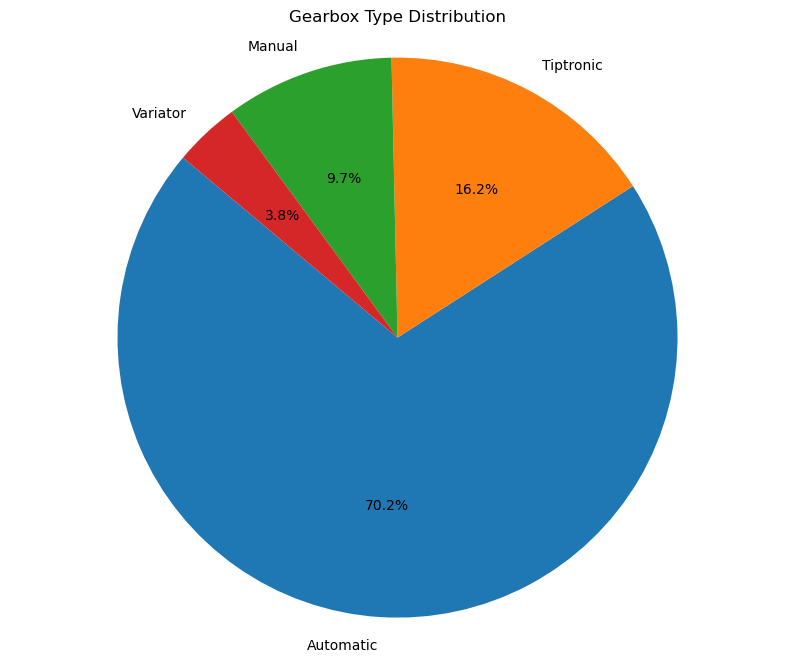

In [37]:
gearbox_counts = df['Gear box type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(gearbox_counts, labels=gearbox_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gearbox Type Distribution')
plt.axis('equal')
plt.show()

Most of the gearbox are Automatic 

## PI chart on Drive wheels

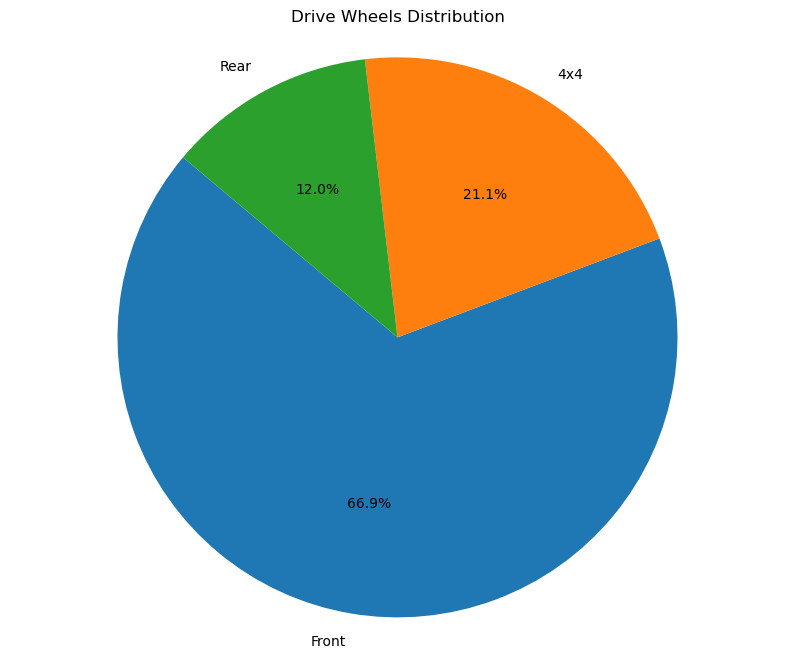

In [38]:
drive_wheels_counts = df['Drive wheels'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(drive_wheels_counts, labels=drive_wheels_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Drive Wheels Distribution')
plt.axis('equal')
plt.show()

Most of the cars has Front wheels 

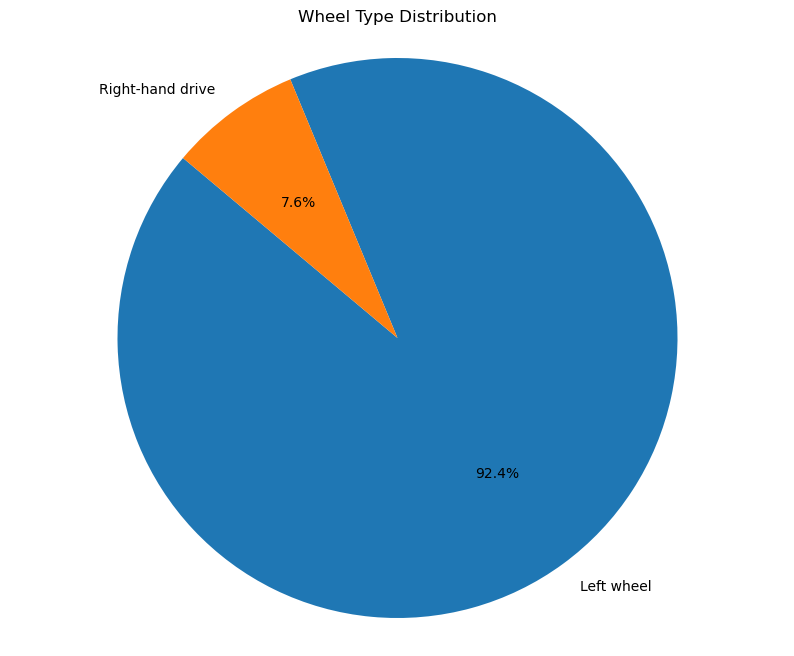

In [39]:
wheel_counts = df['Wheel'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(wheel_counts, labels=wheel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Wheel Type Distribution')
plt.axis('equal')
plt.show()

Most of the cars are left wheel type . It suggests that maybe the dataset is from USA .

## PI chart based on Color

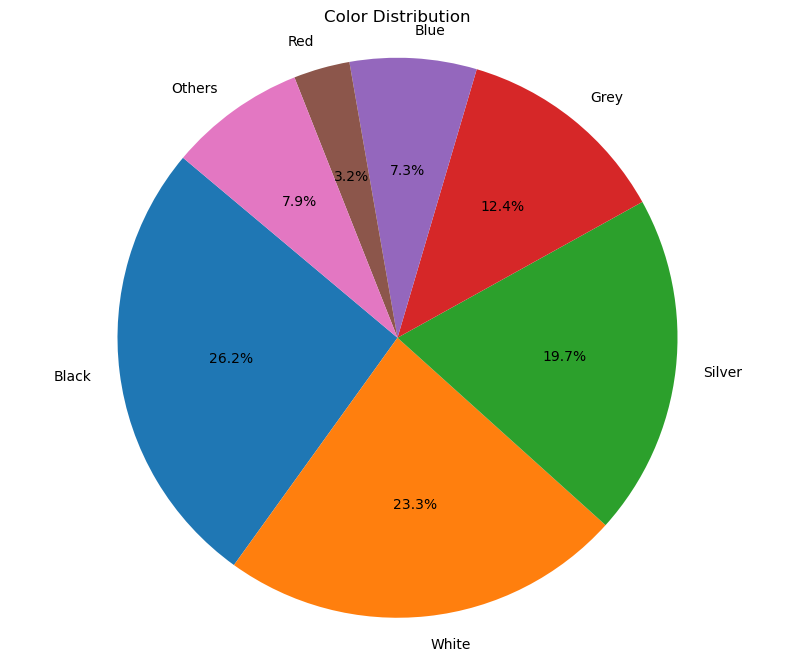

In [40]:
color_counts = df['Color'].value_counts()

total_cars = len(df)
others_mask = color_counts / total_cars * 100 < 3

# Combine colors with less than 3% share into "Others"
others_count = color_counts[others_mask].sum()
color_counts = color_counts[~others_mask]
color_counts['Others'] = others_count

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Color Distribution')
plt.axis('equal')
plt.show()

Most of the car sold are of Black , white silver and gray color .

## Make barplot based on Airbags

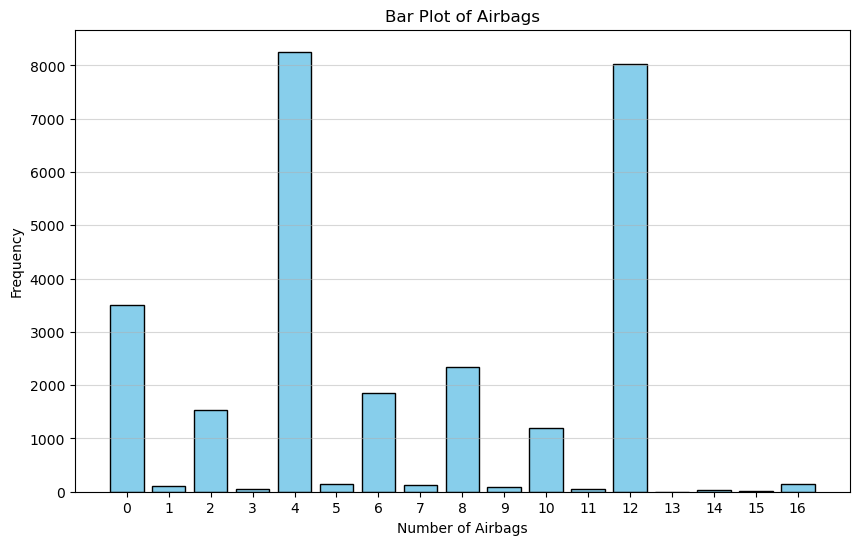

In [41]:
airbags_counts = df['Airbags'].value_counts().sort_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(airbags_counts.index, airbags_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Number of Airbags')
plt.ylabel('Frequency')
plt.title('Bar Plot of Airbags')
plt.xticks(airbags_counts.index)
plt.grid(axis='y', alpha=0.5)
plt.show()

Most of the cars has 4 , 12 airbags .

## Handling categorical values

Combining Manufacturer and model

In [42]:
df['Manufacturer_Model'] = df['Manufacturer'] + ' ' + df['Model']

# Remove the previous "Manufacturer" and "Model" columns
df.drop(columns=['Manufacturer', 'Model'], inplace=True)
df.head()

Price  Levy  Prod. year   Category Leather interior Fuel type  \
0  13328.0  1399        2010       Jeep              Yes    Hybrid   
1  16621.0  1018        2011       Jeep               No    Petrol   
2   8467.0     0        2006  Hatchback               No    Petrol   
3   3607.0   862        2011       Jeep              Yes    Hybrid   
4  11726.0   446        2014  Hatchback              Yes    Petrol   

   Engine volume  Mileage  Cylinders Gear box type Drive wheels  \
0            3.5   186005          6     Automatic          4x4   
1            3.0   192000          6     Tiptronic          4x4   
2            1.3   200000          4      Variator        Front   
3            2.5   168966          4     Automatic          4x4   
4            1.3    91901          4     Automatic        Front   

              Wheel   Color  Airbags  Turbo Manufacturer_Model  
0        Left wheel  Silver       12      0       LEXUS RX 450  
1        Left wheel   Black        8      0  CHEVROLET Equinox  
2  Right-hand drive   Black        2      0          HONDA FIT  
3        Left wheel   White        0      0        FORD Escape  
4        Left wheel  Silver        4      0          HONDA FIT

In [43]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Manufacturer_Model"] = le.fit_transform(df["Manufacturer_Model"])
df["Color"] = le.fit_transform(df["Color"])
df["Wheel"] = le.fit_transform(df["Wheel"])
df["Drive wheels"] = le.fit_transform(df["Drive wheels"])
df["Gear box type"] = le.fit_transform(df["Gear box type"])
df["Fuel type"] = le.fit_transform(df["Fuel type"])
df["Leather interior"] = le.fit_transform(df["Leather interior"])
df["Category"] = le.fit_transform(df["Category"])
    

In [44]:
df.head()

Price  Levy  Prod. year  Category  Leather interior  Fuel type  \
0  13328.0  1399        2010         4                 1          2   
1  16621.0  1018        2011         4                 0          5   
2   8467.0     0        2006         3                 0          5   
3   3607.0   862        2011         4                 1          2   
4  11726.0   446        2014         3                 1          5   

   Engine volume  Mileage  Cylinders  Gear box type  Drive wheels  Wheel  \
0            3.5   186005          6              0             0      0   
1            3.0   192000          6              2             0      0   
2            1.3   200000          4              3             1      1   
3            2.5   168966          4              0             0      0   
4            1.3    91901          4              0             1      0   

   Color  Airbags  Turbo  Manufacturer_Model  
0     12       12      0                 905  
1      1        8      0                 309  
2      1        2      0                 589  
3     14        0      0                 441  
4     12        4      0                 589

# Skewness 

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

#### Why do we calculate Skewness ?

Skewness gives the direction of the outliers if it is right-skewed, most of the outliers are present on the right side of the distribution while if it is left-skewed, most of the outliers will present on the left side of the distribution

#### Below is the function to calculate skewness. 

In [45]:
def right_nor_left(df, list):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in list:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [46]:
float64_cols = ['float64','int32','int64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [47]:
skew_df

column  skewness_value  skewness (+ve or -ve)
0                Price        136.4704  positive (+ve) skewed
1                 Levy          2.0461  positive (+ve) skewed
2           Prod. year         -2.0029  negative (-ve) skewed
3             Category         -0.1743  negative (-ve) skewed
4     Leather interior         -1.0082  negative (-ve) skewed
5            Fuel type         -0.4233  negative (-ve) skewed
6        Engine volume          1.9866  positive (+ve) skewed
7              Mileage         40.4544  positive (+ve) skewed
8            Cylinders         24.8735  positive (+ve) skewed
9        Gear box type          1.3644  positive (+ve) skewed
10        Drive wheels         -0.0110  negative (-ve) skewed
11               Wheel          3.1911  positive (+ve) skewed
12               Color         -0.1581  negative (-ve) skewed
13             Airbags          0.0845  positive (+ve) skewed
14               Turbo          2.6596  positive (+ve) skewed
15  Manufacturer_Model          0.1818  positive (+ve) skewed

In [48]:
skew_total_df

positive (+ve) skewed  normal distrbution  negative (-ve) skewed
0                     10                   0                      6

We notice with the above results that we have following details:
1. 10 columns are positive skewed
2. 6 columns are negative skewed



### Why we are calculating all these metrics? 

Mean / Median /Mode/ Variance /Standard Deviation are all very basic but very important concept of statistics used in data science. Almost all the machine learning algorithm uses these concepts in data preprocessing steps. These concepts are part of descriptive statistics where we basically used to describe and understand the data for features in Machine learning

### Observation: -

- It seems aspiration with turbo have higher price range than the std .
- A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.
- Most cars have their engine on front side.
- Most cars have 4 cylinder.

# Step 4: Data Exploration
**Goal/Purpose:**

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

In [52]:
fig = px.histogram(df, x='Price', title='Distribution of Prices', color_discrete_sequence=['blue'], nbins=50)

fig.update_layout(width=400, height=300)

# Show the plot
fig.show()

From the histogram we can see that there is a outlier in price .

In [53]:
# Remove outliers
df = df[df['Price'] <= 1e5]

In [54]:
fig = px.histogram(df, x='Price', title='Distribution of Prices', color_discrete_sequence=['blue'], nbins=50)

fig.update_layout(width=400, height=300)

# Show the plot
fig.show()

Most of the car sold are below 100k while very few are greater then 300k

In [55]:
# Histogram of levy
fig = px.histogram(df, x='Levy', title='Distribution of Levy', color_discrete_sequence=['blue'], nbins=50)

fig.update_layout(width=400, height=300)

# Show the plot
fig.show()

Most of the taxes are applied are less then 2.5k

In [56]:
# Histogram of Prod. year
fig = px.histogram(df, x='Prod. year', title='Distribution of Prod. year', color_discrete_sequence=['blue'], nbins=50)

fig.update_layout(width=400, height=300)

# Show the plot
fig.show()

Most of the car are manufactured between year 2000 and 2022

In [57]:
# Histogram of Engine volume
fig = px.histogram(df, x='Engine volume', title='Distribution of Engine volume', color_discrete_sequence=['blue'], nbins=50)

fig.update_layout(width=400, height=300)

# Show the plot
fig.show()

Most of the car sold has engine volume between 2 and 5

In [60]:
# Histogram of Mileage
df=df[df['Mileage']<=0.5e6]
fig = px.histogram(df, x='Mileage', title='Distribution of Mileage', color_discrete_sequence=['blue'], nbins=50)

fig.update_layout(width=400, height=300)

# Show the plot
fig.show()

Most of the car has Mileage around 120k

In [61]:
# Histogram of Cylinders
fig = px.histogram(df, x='Cylinders', title='Distribution of Cylinders', color_discrete_sequence=['blue'], nbins=10)

fig.update_layout(width=400, height=300)

# Show the plot
fig.show()

Most of the car has 4 cylinders

In [62]:
# Histogram of Airbags
fig = px.histogram(df, x='Airbags', title='Distribution of Airbags', color_discrete_sequence=['blue'], nbins=10)

fig.update_layout(width=400, height=300)

# Show the plot
fig.show()

Most of the car has 4 and 12 airbags


### Histogram Insight: -

Histogram helps in identifying the following:
- View the shape of your data set’s distribution to look for outliers or other significant data points.

- Determine whether something significant has boccurred from one time period to another.

### Why Histogram? 

It is used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

From the above graphical representation we can identify that the highest bar represents the outliers which is above the maximum range.

We can also identify that the values are moving on the right side, which determines positive and the centered values determines normal skewness.

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

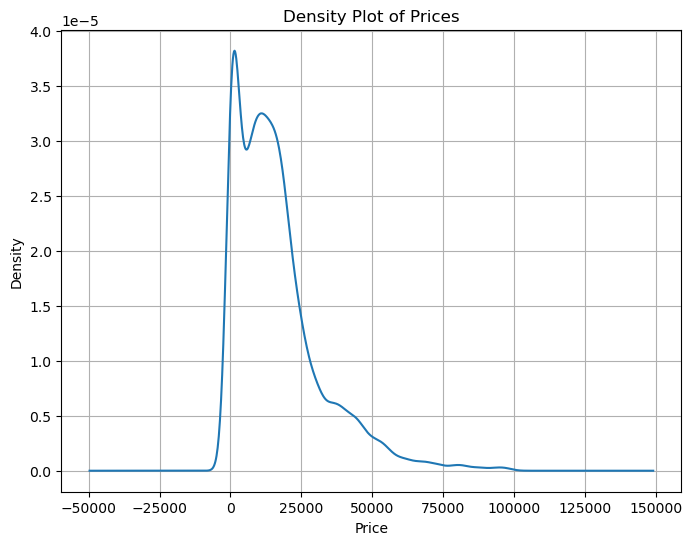

In [63]:
# Density plot of price
prices = df['Price']
plt.figure(figsize=(8, 6)) 
prices.plot(kind='density')
plt.title('Density Plot of Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()

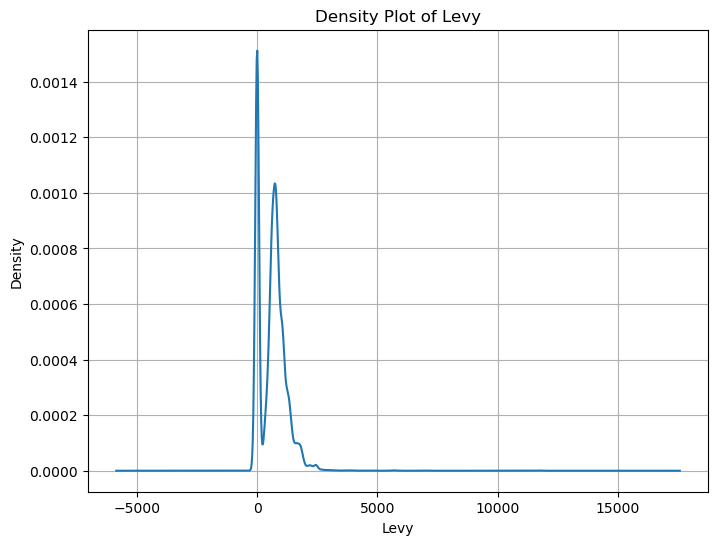

In [64]:
# Density plot of Levy
Levy = df['Levy']
plt.figure(figsize=(8, 6)) 
Levy.plot(kind='density')
plt.title('Density Plot of Levy')
plt.xlabel('Levy')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Most of the cars does not have any taxes.

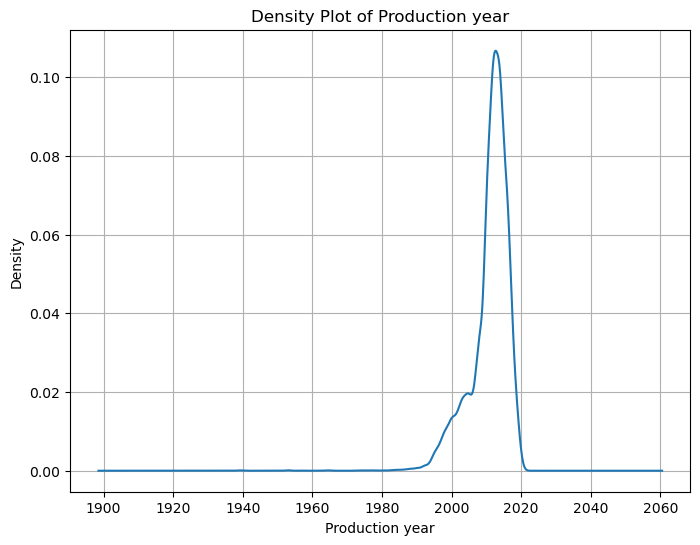

In [66]:
# Density plot of Prod. year
year = df['Prod. year']
plt.figure(figsize=(8, 6))  
year.plot(kind='density')
plt.title('Density Plot of Production year')
plt.xlabel('Production year')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Most of the cars are manufactured around year 2002 and 2020

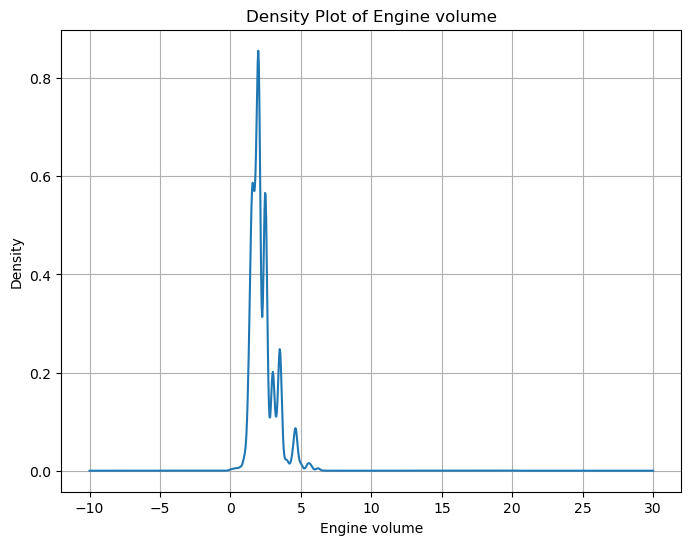

In [68]:
# Density plot of Engine volume
EVolume = df['Engine volume']
plt.figure(figsize=(8, 6))
EVolume.plot(kind='density')
plt.title('Density Plot of Engine volume')
plt.xlabel('Engine volume')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Most of the engine volume are 2 to 4

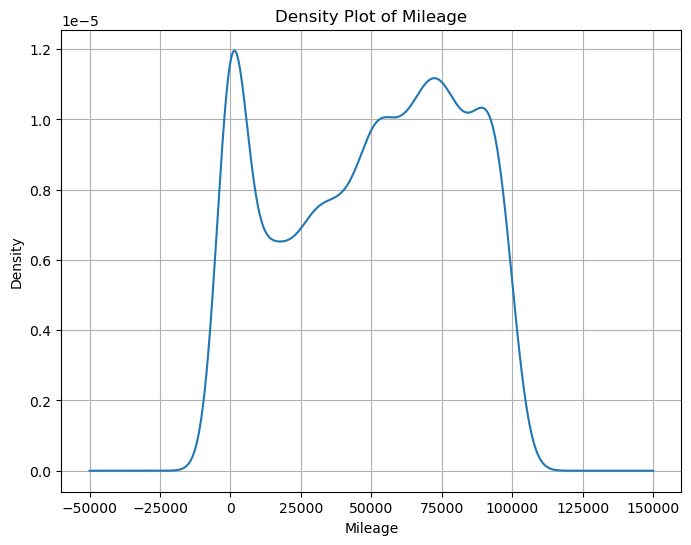

In [69]:
# Density plot of Mileage
df=df[df['Mileage']<1e5]
Mileage = df['Mileage']
plt.figure(figsize=(8, 6))
Mileage.plot(kind='density')
plt.title('Density Plot of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Mileage of cars varies between 10k to 1000k on an average

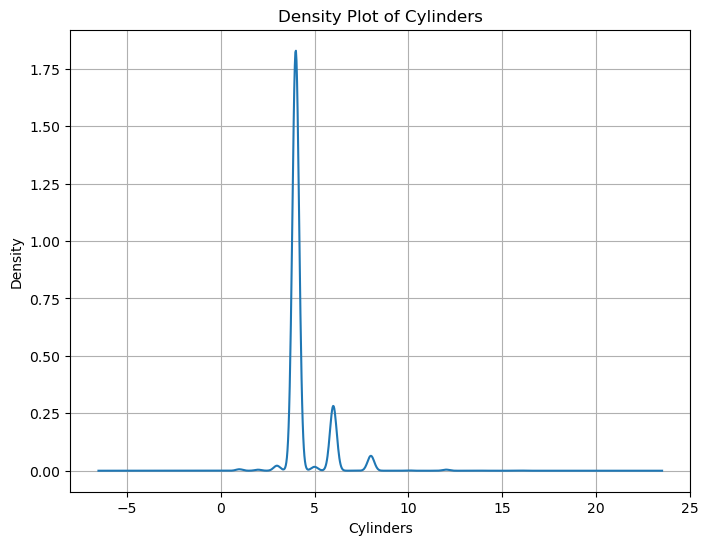

In [70]:
# Density plot of Cylinders
Cylinders = df['Cylinders']
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
Cylinders.plot(kind='density')
plt.title('Density Plot of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Most of the cars has 4 Cylinders.

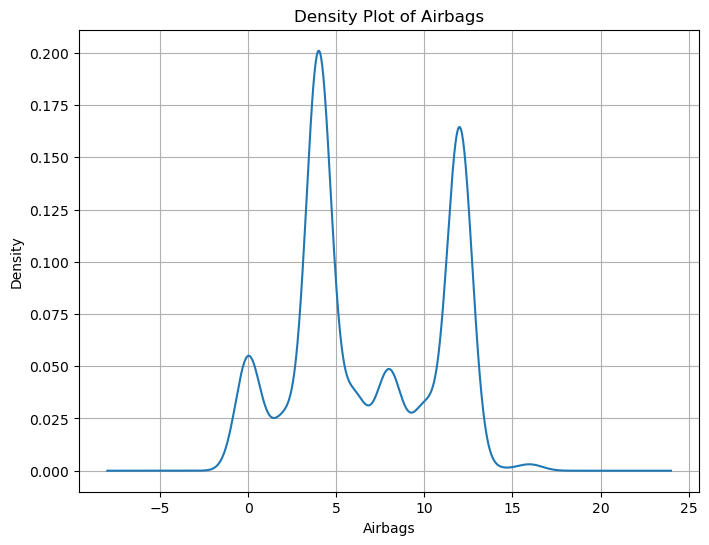

In [71]:
# Density plot of Airbags
Airbags = df['Airbags']
plt.figure(figsize=(8, 6))
Airbags.plot(kind='density')
plt.title('Density Plot of Airbags')
plt.xlabel('Airbags')
plt.ylabel('Density')
plt.grid(True)
plt.show()

most of the cars have 4 and 12 airbags

### Distplot Insights: -

Above is the distrution bar graphs to confirm about the statistics of the data about the skewness, the above results are:
1. 10 columns are positive skewed
2. 6 columns are neagtive skewed


### Why Distplot?
Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

We can observe that the bell curve is shifted to left we indicates positive skewness.As all the column are positively skewed we don't need to do scaling.

Let's proceed and check the distribution of the target variable.


In [72]:
#+ve skewed 
df['Price'].skew()

1.3629557162350634

#### The target variable is positively skewed.A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. 

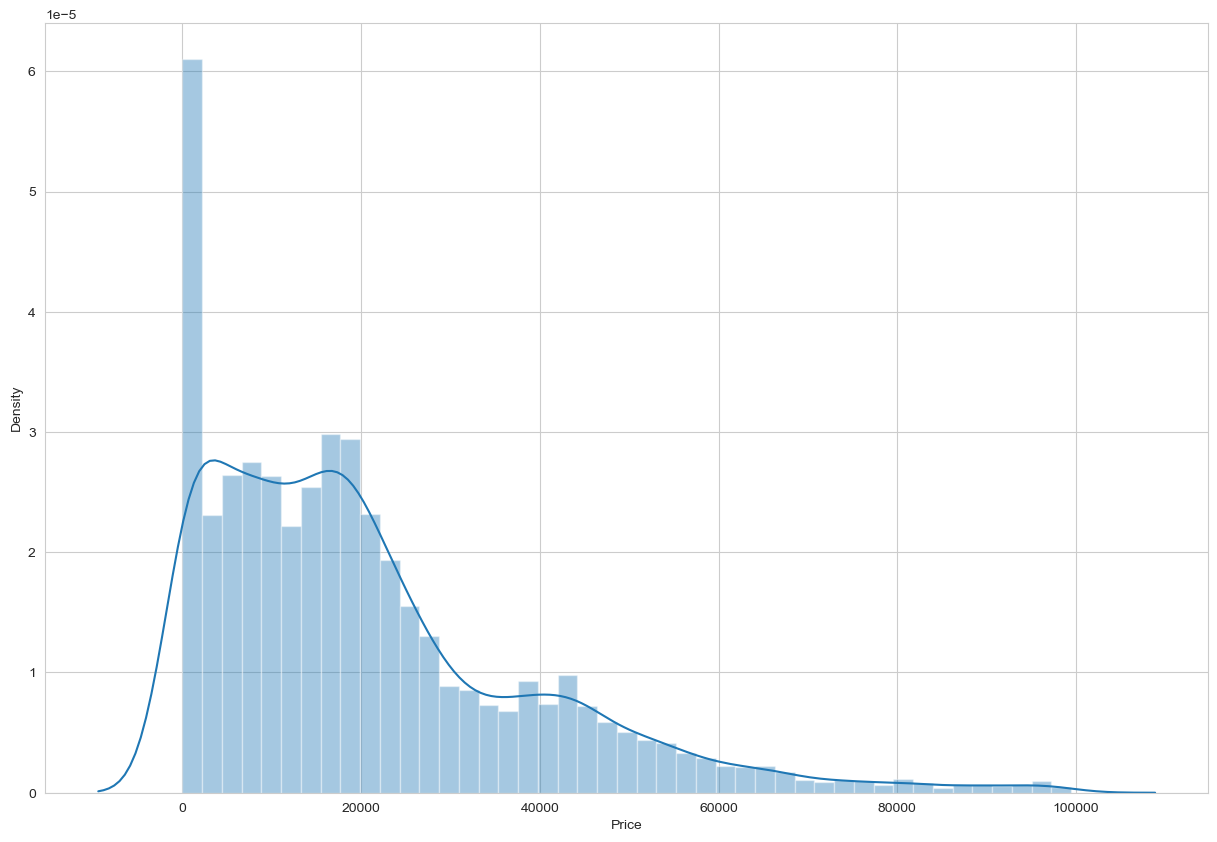

In [73]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(df.Price)
plt.show()

In [74]:
df['Price'].mean()

20604.016666666666


#### The average price of the cars is 20604 in the dataset

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



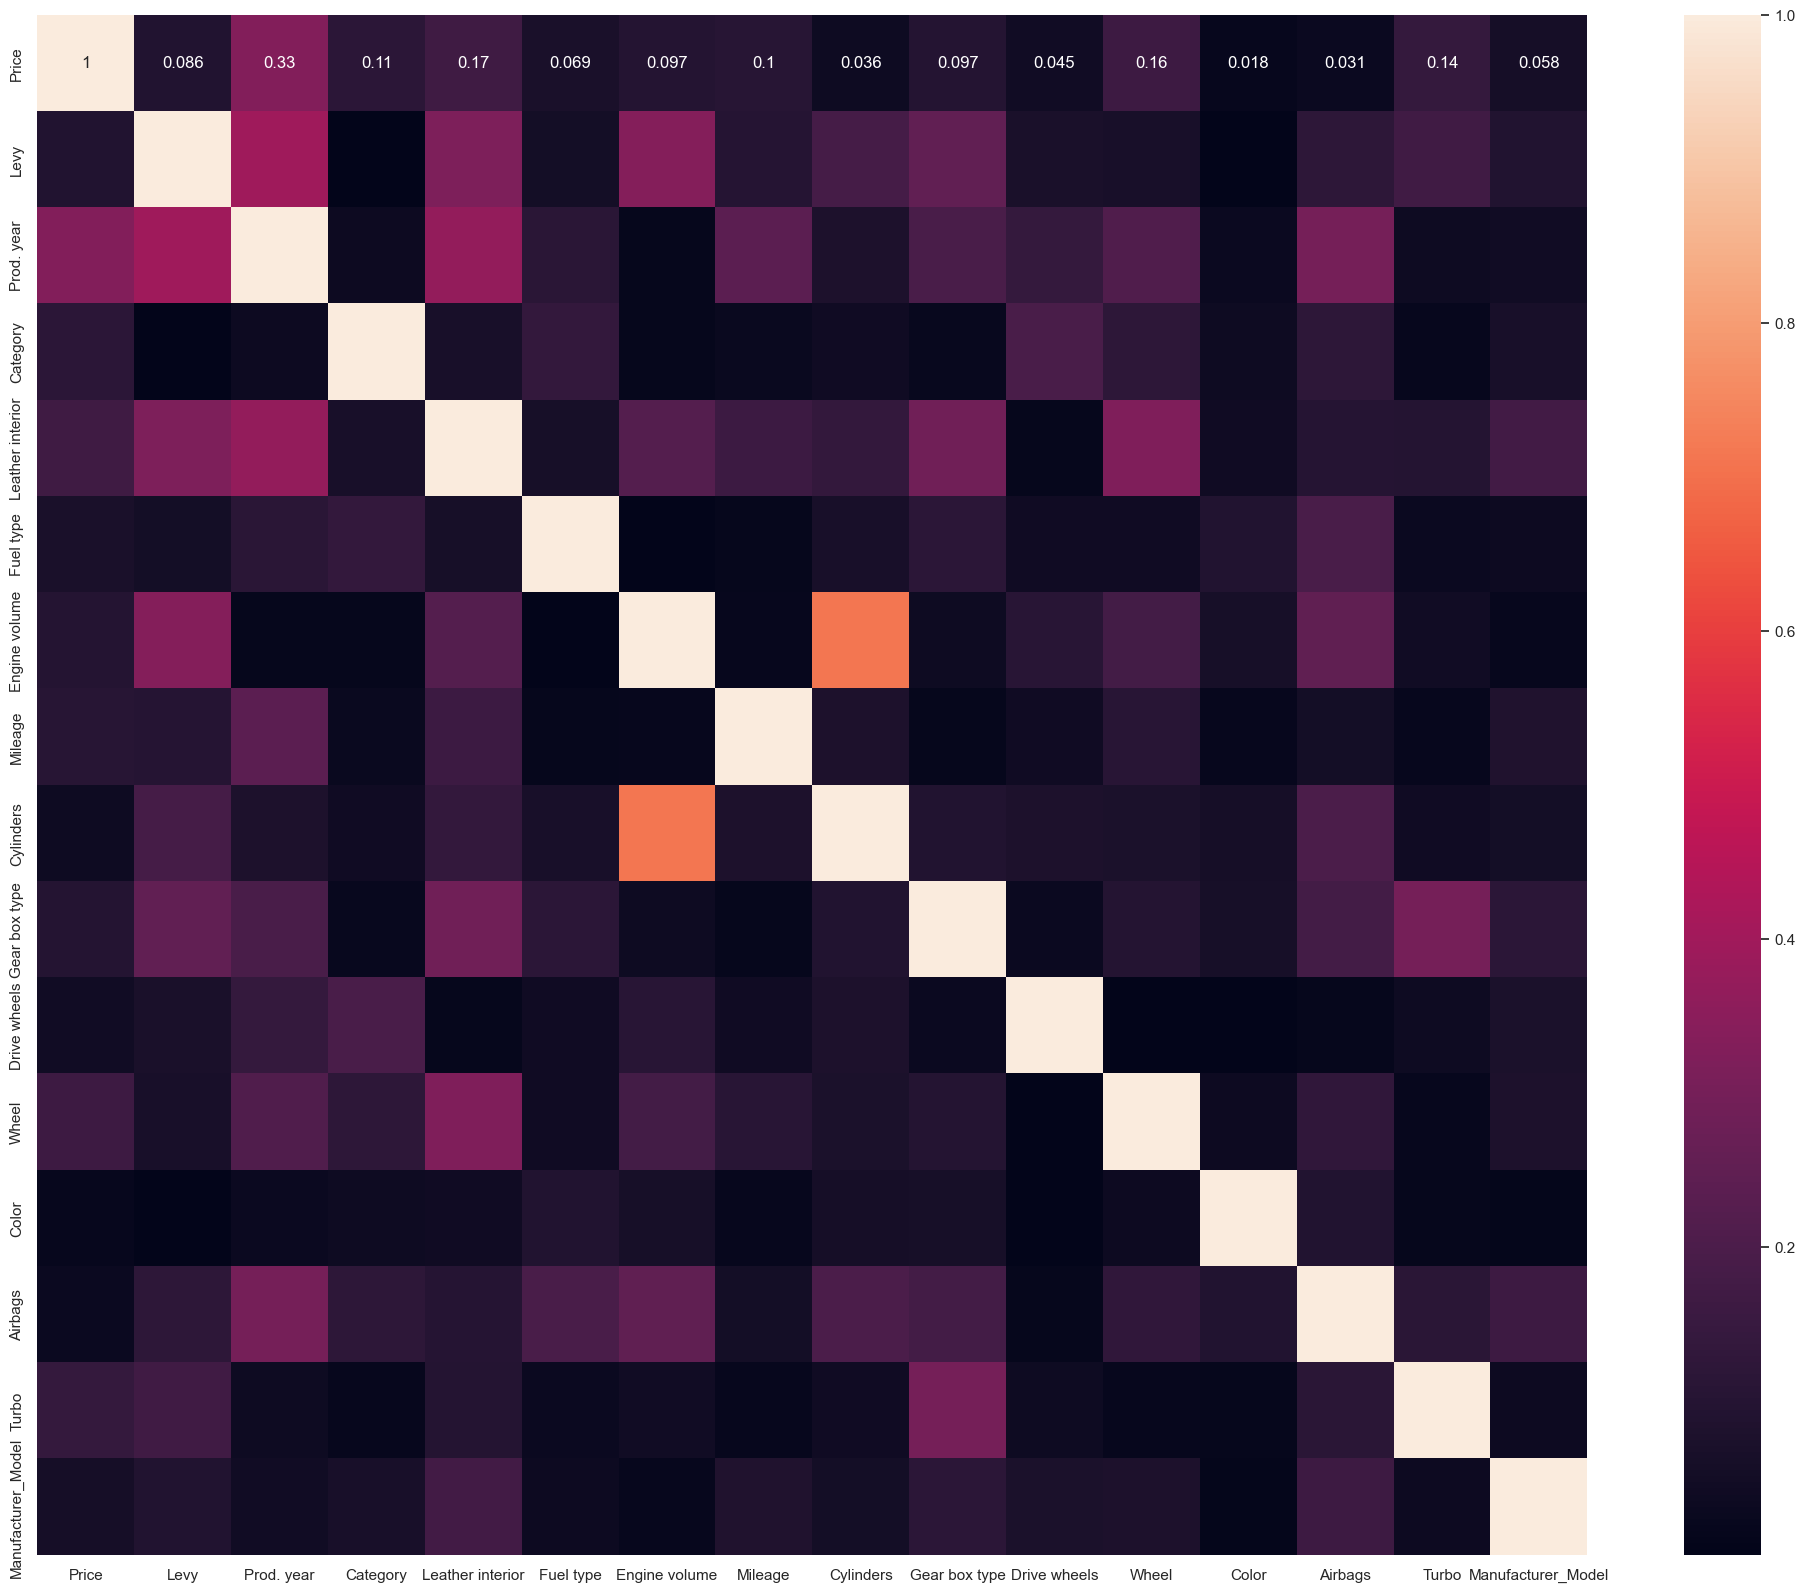

In [75]:
#correlation plot
sns.set(rc = {'figure.figsize':(25,20)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True) 
plt.show()

### Notice the first column from left side of this map. We can see the correlation of all variables against diagnosis. As you can see, some variables seem to be strongly correlated with the target variable. Here, a numeric correlation score will help us understand the graph better.

In [76]:
print (corr['Price'].sort_values(ascending=False), '\n')

Price                 1.000000
Prod. year            0.328840
Leather interior      0.167010
Wheel                 0.160727
Turbo                 0.139432
Category              0.113438
Mileage               0.102795
Gear box type         0.097441
Engine volume         0.096529
Levy                  0.086437
Fuel type             0.068758
Manufacturer_Model    0.057790
Drive wheels          0.045365
Cylinders             0.035973
Airbags               0.030969
Color                 0.017509
Name: Price, dtype: float64 



### Heatmap insights: -

As we know, it is recommended to avoid correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, hence increasing the risk of errors.




### Why Heatmap?

Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

# 4. Boxplot

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

Basically, to find the outlier in a dataset/column.

In [77]:
fig = go.Figure( )
fig.add_trace(go.Box(y=prices, name='Box Plot'))
fig.update_layout(title='Box Plot Example', yaxis_title='Values',height=400,width=500)

# Show the plot
fig.show()

Median of the data is around 13k . Many cars has price above 47k which are shown as outliers .

In [78]:
fig = go.Figure( )
fig.add_trace(go.Box(y=Levy, name='Box Plot'))
fig.update_layout(title='Box Plot of Levy', yaxis_title='Levy',height=400,width=500)

# Show the plot
fig.show()

Median value of taxe is 642 . Many car has taxe greater than 2278 . Those are shown as outliers .

In [79]:
fig = go.Figure( )
fig.add_trace(go.Box(y=year, name='Box Plot'))
fig.update_layout(title='Box Plot production year', yaxis_title='year',height=400,width=500)

# Show the plot
fig.show()

Median value of production year is 2012 . and some cars are manufactured before 2002 , which is shown as outliers.

In [80]:
fig = go.Figure( )
fig.add_trace(go.Box(y=EVolume, name='Box Plot'))
fig.update_layout(title='Box Plot of Engine Volume', yaxis_title='Engine Volume',height=400,width=500)

# Show the plot
fig.show()

Median value of engine volume is 2 . some of the cars has engine volume greater than 4 , which are shown as outliers .

In [81]:
fig = go.Figure( )
fig.add_trace(go.Box(y=Mileage, name='Box Plot'))
fig.update_layout(title='Box Plot of Mileage', yaxis_title='Mileage',height=400,width=500)

# Show the plot
fig.show()

Median mileage of cars are 52.4k  and there is no outliers in the distribution . Which shows that the mileage distributed normally .

In [82]:
fig = go.Figure( )
fig.add_trace(go.Box(y=Airbags, name='Box Plot'))
fig.update_layout(title='Box Plot of Airbags', yaxis_title='Airbags',height=400,width=500)

# Show the plot
fig.show()

Median no of airbags is 6 . No outliers in the data of airbags .

#### The round points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

### Boxplot Insights: - 
- Sometimes outliers may be an error in the data and should be removed. In this case these points are correct readings yet they are different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and compare their validation accuracy.

- So we will keep it unchanged as it won't affect our model.

Here, we can see that most of the variables possess outlier values. It would take us days if we start treating these outlier values one by one. Hence, for now we'll leave them as is and let our algorithm deal with them. As we know, tree-based algorithms are usually robust to outliers.

### Why Boxplot?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.



In the next step we will divide our cleaned data into training data and testing data.

# 5. Scatter Plot

Scatter plots are the graphs that present the relationship between two variables in a data-set. It represents data points on a two-dimensional plane or on a Cartesian system. The independent variable or attribute is plotted on the X-axis, while the dependent variable is plotted on the Y-axis. These plots are often called scatter graphs or scatter diagrams.

In [89]:
fig = go.Figure(data=go.Scatter(y=df['Price'], x=df['Levy'], mode='markers'))

# Update layout
fig.update_layout(
    title='Scatter Plot of Leavy vs price',
    xaxis_title='Leavy',
    yaxis_title='Price',
    showlegend=False
)

# Show the plot
fig.show()

Most of the points are concentrated on lower values of Leavy . So they does not have that much affect on Price .

In [90]:
fig = go.Figure(data=go.Scatter(y=df['Price'], x=df['Prod. year'], mode='markers'))

# Update layout
fig.update_layout(
    title='Scatter Plot of production year vs Price',
    xaxis_title='Production year',
    yaxis_title='Price',
    showlegend=False
)

# Show the plot
fig.show()

If the cars are old then their price is also very low .

In [91]:
fig = go.Figure(data=go.Scatter(y=df['Price'], x=df['Engine volume'], mode='markers'))

# Update layout
fig.update_layout(
    title='Scatter Plot of Engine volume vs price',
    xaxis_title='Engine volume',
    yaxis_title='Price',
    showlegend=False
)

# Show the plot
fig.show()

In [92]:
fig = go.Figure(data=go.Scatter(y=df['Price'], x=df['Mileage'], mode='markers'))

# Update layout
fig.update_layout(
    title='Scatter Plot Mileage vs Price',
    xaxis_title='Mileage',
    yaxis_title='Price',
    showlegend=False
)

# Show the plot
fig.show()

In [93]:
fig = go.Figure(data=go.Scatter(y=df['Price'], x=df['Cylinders'], mode='markers'))

# Update layout
fig.update_layout(
    title='Scatter Plot Example',
    xaxis_title='Cylinders',
    yaxis_title='Price',
    showlegend=False
)

# Show the plot
fig.show()

In [94]:
fig = go.Figure(data=go.Scatter(y=df['Price'], x=df['Airbags'], mode='markers'))

# Update layout
fig.update_layout(
    title='Scatter Plot Airbags vs Price',
    xaxis_title='Airbags',
    yaxis_title='Price',
    showlegend=False
)

# Show the plot
fig.show()

### Why use Scatter plot? 

Scatter plots are used in either of the following situations.

- When we have paired numerical data
- When there are multiple values of the dependent variable for a unique value of an independent variable
- In determining the relationship between variables in some scenarios, such as identifying potential root causes of problems, checking whether two products that appear to be related both occur with the exact cause and so on.

# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we will spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Scaling on train dataset.

**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

In [95]:
# Separate target and feature column in X and y variable

target = 'Price'

# X will be the features
X = df.drop(target,axis=1) 
#y will be the target variable
y = df[target]

In [96]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6960 entries, 4 to 19235
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Levy                6960 non-null   int32  
 1   Prod. year          6960 non-null   int64  
 2   Category            6960 non-null   int32  
 3   Leather interior    6960 non-null   int32  
 4   Fuel type           6960 non-null   int32  
 5   Engine volume       6960 non-null   float64
 6   Mileage             6960 non-null   int32  
 7   Cylinders           6960 non-null   int32  
 8   Gear box type       6960 non-null   int32  
 9   Drive wheels        6960 non-null   int32  
 10  Wheel               6960 non-null   int32  
 11  Color               6960 non-null   int32  
 12  Airbags             6960 non-null   int64  
 13  Turbo               6960 non-null   int32  
 14  Manufacturer_Model  6960 non-null   int32  
dtypes: float64(1), int32(12), int64(2)
memory usage: 543.8 KB


In [98]:
# Check the shape of X and y variable
X.shape, y.shape

((6960, 15), (6960,))

#### 2. Spliting the dataset in training and testing data. 

*Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training part and 20% goes into testing  part.*

In [99]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5568, 15), (1392, 15), (5568,), (1392,))

### Insights: -

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In the next step we will train our model on the basis of our training and testing data.

# Step 3: Model Training

#### Goal:
In this step we are going to train our dataset on different regression algorithms. As we know that our target variable is in continuous format so we have to apply regression algorithm. Target variable is a continous value.In our dataset we have the outcome variable or Dependent variable i.e Price. So we will use Regression algorithm**

__Algorithms we are going to use in this step__

1. Linear Regression
2. K-Nearest Neighbors
3. Decision Trees
4. Random forest
5. 

# 1. Linear Regression

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. There are simple linear regression calculators that use a “least squares” method to discover the best-fit line for a set of paired data. You then estimate the value of X (dependent variable) from Y (independent variable).

#### Training

In [101]:
#Using linear regression on our training data 
from sklearn.linear_model import LinearRegression

In [102]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [103]:
# Predict on the testing data
y_pred = model.predict(X_test)

In [104]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 249707492.3063775


In [105]:
#Accuracy check of trainig data
from sklearn.metrics import r2_score

#Get R2 score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.22739132745417767


MSE and R2 score is not good enough . Linear regression does not learn the data well .

# 2. K-Nearest Neighbors

K-Nearest Neighbors (KNN) is a simple yet powerful machine learning algorithm that operates on the principle of similarity. It stores all training data points and their labels or values, and when making predictions for new instances, it identifies the k-nearest neighbors based on distance measures. For classification, it employs majority voting among neighbors, while for regression, it averages their values. KNN's appeal lies in its simplicity, flexibility, and ability to handle locally smooth decision boundaries or regression surfaces.

However, KNN has limitations. Its computational cost can be high, particularly for large datasets, due to the need to calculate distances for each new instance. Memory usage is also a concern, as it stores the entire training dataset. Additionally, KNN is sensitive to feature scaling and requires careful selection of the optimal k value. Despite these challenges, KNN remains a valuable choice for straightforward classification and regression tasks, especially when dealing with small datasets or relatively simple decision-making scenarios.

In [106]:
from sklearn.neighbors import KNeighborsRegressor

k = 5 
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_regressor.fit(X_train, y_train)

# Predict on the testing data
y_pred = knn_regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Mean Squared Error: 304408619.2487356
R-squared Score: 0.05814304145624716


# 3. Decision Trees

Decision Trees are powerful and interpretable algorithms used for classification and regression tasks. They partition the feature space based on feature values, forming a hierarchical structure of decisions. This structure allows them to learn rules that separate data into classes or predict values. Decision Trees are easy to understand, handle both numerical and categorical features, and are robust to outliers and missing values.

In predicting car prices, Decision Trees effectively capture complex relationships between features and the target variable. They handle factors like make, model, year, mileage, and features such as engine type and fuel efficiency. By splitting the feature space based on these factors, Decision Trees identify patterns and interactions driving car pricing, offering insights into market dynamics. They handle nonlinear relationships and feature interactions, providing accurate and interpretable models for predicting car prices with transparency.

In [107]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Predict on the testing data
y_pred = decision_tree.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Mean Squared Error: 144658268.32582614
R-squared Score: 0.552419386251874


Decision tree gives a significantly better result for this case . One possible reason may be that decision tree is a tree based model and this type of model can better handle outliers , which was affecting the previous models .

# 4. Random forest

Random Forest is an ensemble learning technique that combines multiple decision trees to create a more robust and accurate predictive model. By constructing numerous decision trees during training, it outputs the average prediction of the individual trees for regression tasks or a majority vote for classification tasks. To combat overfitting, Random Forest introduces randomness through bootstrapping the training data (sampling with replacement) and considering only a random subset of features at each split. This decorrelates the individual trees, leading to a more reliable and generalizable model.

In car price prediction projects, Random Forest proves beneficial for handling complex relationships between features and the target variable. With factors like make, model, year, mileage, and features like engine type and fuel efficiency influencing car prices, Random Forest effectively captures these nonlinear relationships and interactions. Its robustness to overfitting and noise in the data makes it suitable for diverse and potentially noisy datasets commonly encountered in car price prediction tasks. By leveraging Random Forest, accurate predictions can be obtained while maintaining model interpretability, facilitating informed decision-making in the dynamic automotive market.


In [108]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest.fit(X_train, y_train)

# Predict on the testing data
y_pred = random_forest.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Mean Squared Error: 73405450.8146454
R-squared Score: 0.7728795103915176


This model is a significant improvement from the previous models . As it has a higher R-squared score then the others .

## XGBoost

XGBoost, or eXtreme Gradient Boosting, is a leading machine learning algorithm renowned for its speed, efficiency, and exceptional performance. It operates within the gradient boosting framework, sequentially training weak learners to correct errors made by preceding models, thus continuously enhancing predictive accuracy. With advanced regularization techniques, XGBoost effectively mitigates overfitting while its optimized tree pruning and split finding algorithms ensure computational efficiency and model interpretability. Designed for parallel and distributed computing, XGBoost scales seamlessly to large datasets, leveraging multiple CPU cores for rapid training. Its versatility extends to various objective functions and evaluation metrics, making it adaptable for regression, classification, and ranking tasks, and its optimization for both speed and performance renders it a favored choice across diverse machine learning applications.

In [109]:
import xgboost as xgb

# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model to the training data
xgb_regressor.fit(X_train, y_train)

# Predict on the testing data
y_pred = xgb_regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

Mean Squared Error: 74901931.304469
R-squared Score: 0.7682493177046487


Xgboost is an improvement from knn , descision tree and linear regression . but not performing well as good as random forest .

## Conclusion

The final models that are giving the best performance are Random forest and XGBoost which giving the heighest R2 scores of 0.77 and 0.78 respectively .

This 2 models are performing better becouse this 2 models are tree based models which are suitable for datasets that contains many outliers .